In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
hbar = 1.0545718e-34
k_B = 1.38064852e-23
m0 = 1.660539066e-27
a0 = 5.2917721067e-11
m = 164 * m0
a_dd = 131*a0

In [8]:
def tau_k(kx, ky, kz):
    return hbar**2*(kx**2+ky**2+kz**2)/(2*m)

def a_s_func(a_dd, eps_dd):
    return a_dd/eps_dd*1

def V_tilde(kx, ky, kz, a_s):
    return 4*np.pi*hbar**2*a_s/m + 4*np.pi*hbar**2*a_dd/m*(3*(kz**2)/(kx**2 + ky**2 + kz**2) - 1)

def epsilon_k(kx, ky, kz, a_s, n):
    return np.sqrt(tau_k(kx, ky, kz)*(tau_k(kx, ky, kz) + 2*n*V_tilde(kx, ky, kz, a_s)))

def integrand(kx, ky, kz, a_s, n, T):
    return 1/(2*np.pi)**3 * 1/(np.exp(epsilon_k(kx, ky, kz, a_s, n)/(k_B*T)) - 1)*V_tilde(kx, ky, kz, a_s) * tau_k(kx, ky, kz)/epsilon_k(kx, ky, kz, a_s, n)

C:\Users\DyLab - OfficePC\AppData\Local\Temp\ipykernel_7268\920594896.py:11: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(tau_k(kx, ky, kz)*(tau_k(kx, ky, kz) + 2*n*V_tilde(kx, ky, kz, a_s)))


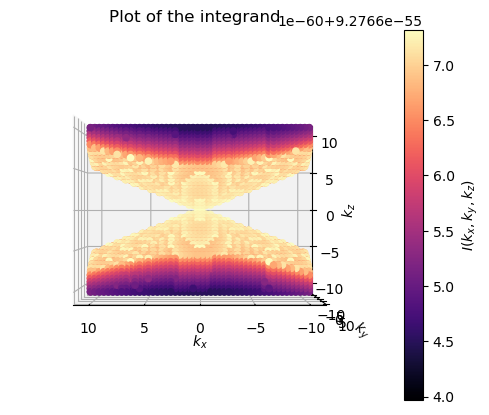

In [42]:
#experimental parameters
a_s = a_s_func(a_dd, eps_dd = 3)
n = 3000 * 10**18
T = 100 * 10**(-9)

#plotting parameters 
npoints = 50
kx = np.linspace(-10, 10, npoints)
ky = np.linspace(-10, 10, npoints)
kz = np.linspace(-10, 10, npoints)
KX, KY, KZ = np.meshgrid(kx, ky, kz)

F = integrand(KX, KY, KZ, a_s, n, T)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(KX, KY, KZ, c=F, cmap='magma')
fig.colorbar(p, label='$I(k_x, k_y, k_z)$')
ax.set_xlabel("$k_x$")
ax.set_ylabel("$k_y$")
ax.set_zlabel("$k_z$")
ax.view_init(elev = 0, azim = 90)
ax.set_title("Plot of the integrand")
#fig.tight_layout()
plt.show()

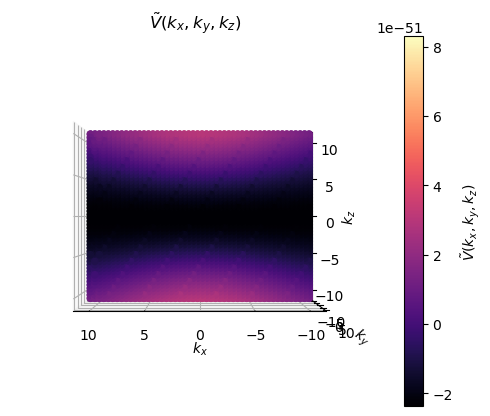

In [33]:
#plotting parameters 
npoints = 50
kx = np.linspace(-10, 10, npoints)
ky = np.linspace(-10, 10, npoints)
kz = np.linspace(-10, 10, npoints)
KX, KY, KZ = np.meshgrid(kx, ky, kz)

F = V_tilde(KX, KY, KZ, a_s)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(KX, KY, KZ, c=F, cmap='magma')
fig.colorbar(p, label='$\\tilde{V}(k_x, k_y, k_z)$')
ax.set_xlabel("$k_x$")
ax.set_ylabel("$k_y$")
ax.set_zlabel("$k_z$")
ax.view_init(elev = 0, azim = 90)
ax.set_title("$\\tilde{V}(k_x, k_y, k_z)$")
#fig.tight_layout()
plt.show()